In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=36c14b138cabd378d2092eb626863e6419bed4917988a589eda677c24e56df72
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import face_recognition
import cv2

In [ ]:
def find_face_and_loaction(path):
  image = cv2.imread(path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  boxes = face_recognition.face_locations(image,model="cnn")
  for top, right, bottom, left in boxes:
    crop_image = image[top : bottom, left :right]
  return image, boxes, crop_image

In [ ]:
image, boxes, crop_image = find_face_and_loaction("/content/s035-00_img.tif")

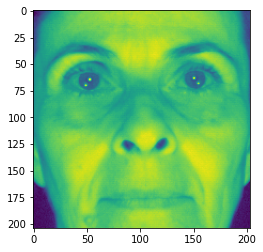

In [ ]:
import matplotlib.pyplot as plt

hsv = cv2.cvtColor(crop_image, cv2.COLOR_BGR2HSV)
hsv = hsv/255.0
v = hsv[:, :, 2]
plt.imshow(v)

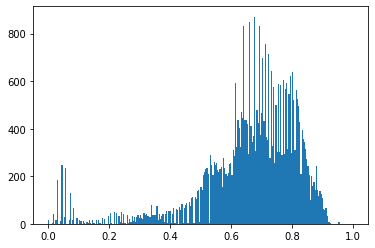

In [ ]:
values = plt.hist(v.ravel(),256,[0,1])

In [ ]:
print("Mean : ", v.mean())
print("Stdev : ",v.std())

mu = v.mean()
sigma = v.std()

Mean :  0.666235135027642
Stdev :  0.16594514747360542


In [ ]:
D = ((mu + (2*sigma)) - (mu - (2*sigma)))

tres = 1/ 3

In [ ]:
Flag = ""
if D < tres or D == tres:
  print("Low contrast Image")
  Flag = "Low"
else:
  print("High contrast Image")
  Flag = "High"

High contrast Image


In [ ]:
if mu >= 0.50:
  print("Bright")
else:
  print("Dark")

Bright


In [ ]:
import numpy as np
if Flag == "High":
  gamma = np.exp((1 - (mu + sigma)) / 2)
else:
  gamma = -np.log(sigma)

In [ ]:
print("gamma value : ", gamma)

gamma value :  1.0875308579987253


In [ ]:
heaviside_x = (0.50 - mu)

if heaviside_x <= 0:
  heaviside = 0
else:
  heaviside = 1

In [ ]:
print("heaviside : ", heaviside)

heaviside :  0


In [ ]:
power_val = np.power(crop_image/255 , gamma)

k = power_val + ((1- power_val) * np.power(mu, gamma))

c = 1 / (1 + (heaviside * (k -1)))

In [ ]:
image_out = c * (np.power(crop_image/255, gamma))

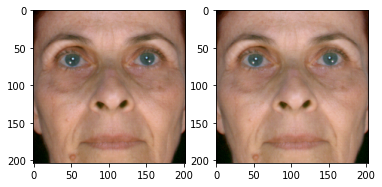

In [ ]:
plt.subplot(121)
plt.imshow(image_out)
plt.subplot(122)
plt.imshow(crop_image)

In [ ]:
print("Mean of original Image  : ", image_out.mean())
print("Mean of Corrected Image : ", (crop_image/255).mean())

Mean of original Image  :  0.5100704912168784
Mean of Corrected Image :  0.5353990728588032


In [ ]:
print("Deviation of original Image  : ", image_out.std())
print("Deviation of Corrected Image : ", (crop_image/255).std())

Deviation of original Image  :  0.17865092352546785
Deviation of Corrected Image :  0.17677772732057637


Algorithm for Auto Gamma Correction in Colored Image

In [ ]:
def auto_gama_correction(crop_image):
  # Converting the BGR Image to HSV Image and take the v channel to get the correct value of the Image
  hsv = cv2.cvtColor(crop_image, cv2.COLOR_BGR2HSV)
  hsv = hsv/255.0
  v = hsv[:, :, 2]
  # Calculate the mean and distribution of the Image using the v channel
  mu = v.mean()
  sigma = v.std()
  print("Mean : ", mu)
  print("Stdev : ", sigma)
  # Calculating the D value to Determine the low or High contrast Image
  # where D = 4 * sigma
  D = ((mu + (2*sigma)) - (mu - (2*sigma)))
  tres = 1/ 3
  Flag = ""
  if D < tres or D == tres:
    print("Low contrast Image")
    Flag = "Low"
  else:
    print("High contrast Image")
    Flag = "High"

  # Determining the Image is Brighter or Darker
  if mu >= 0.50:
    print("Bright")
  else:
    print("Dark")

  # Calculating the gamma value
  if Flag == "High":
    gamma = np.exp((1 - (mu + sigma)) / 2)
  else:
    gamma = -np.log(sigma)

  print("gamma value : ", gamma)

  # Calculating the Value of C
  heaviside_x = (0.50 - mu)

  if heaviside_x <= 0:
    heaviside = 0
  else:
    heaviside = 1
  
  print("heaviside : ", heaviside)
  power_val = np.power(crop_image/255 , gamma)

  k = power_val + ((1- power_val) * np.power(mu, gamma))

  c = 1 / (1 + (heaviside * (k -1)))

  image_out = c * (np.power(crop_image/255, gamma))
  return image_out

In [ ]:
def print_report(original, corrected):
  print("Mean of the Original Image : ", original.mean())
  print("Mean of the Corrected Image : ", corrected.mean())
  print()
  print("Deviation of the Original Image : ", original.std())
  print("Deviation of the Corrected Image : ", corrected.std())

In [ ]:
def main(path):
  image, boxes, crop_image = find_face_and_loaction(path)
  corrected_image = auto_gama_correction(crop_image)
  print_report(crop_image / 255, corrected_image)
  plt.subplot(121)
  plt.imshow(crop_image)
  plt.title("original Image")
  plt.subplot(122)
  plt.imshow(corrected_image)
  plt.title("Corrected image")

In [ ]:
path = "/content/s036-00_img.tif"
image, boxes, crop_image = find_face_and_loaction(path)
corrected_image = auto_gama_correction(crop_image)

Mean :  0.5398798866485369
Stdev :  0.22941549815634163
High contrast Image
Bright
gamma value :  1.1222687517395
heaviside :  0


Text(0.5, 1.0, 'Corrected image')

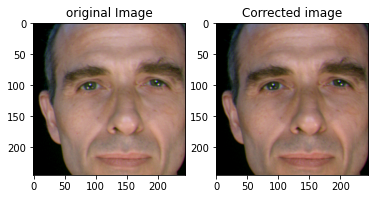

In [ ]:
plt.subplot(121)
plt.imshow(crop_image)
plt.title("original Image")
plt.subplot(122)
plt.imshow(corrected_image)
plt.title("Corrected image")

In [ ]:
print_report(crop_image / 255, corrected_image)

Mean of the Original Image :  0.44079030251556406
Mean of the Corrected Image :  0.40702844708427816

Deviation of the Original Image :  0.20748271326873272
Deviation of the Corrected Image :  0.20096025685265173


Mean :  0.643467745448416
Stdev :  0.17812927336958984
High contrast Image
Bright
gamma value :  1.093300923983966
heaviside :  0
Mean of the Original Image :  0.5147182875854872
Mean of the Corrected Image :  0.4876547549786069

Deviation of the Original Image :  0.18408691744090885
Deviation of the Corrected Image :  0.18495615611651922


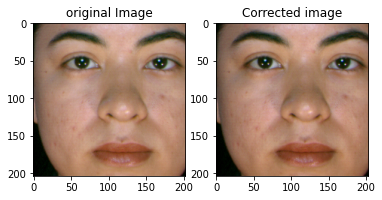

In [ ]:
path = "/content/s037-00_img.tif"
main(path)

Mean :  0.41256253321000536
Stdev :  0.24467379978950213
High contrast Image
Dark
gamma value :  1.1869438774417205
heaviside :  1
Mean of the Original Image :  0.30179378855367284
Mean of the Corrected Image :  0.4336106284437196

Deviation of the Original Image :  0.20642707596170898
Deviation of the Corrected Image :  0.26966336776544925


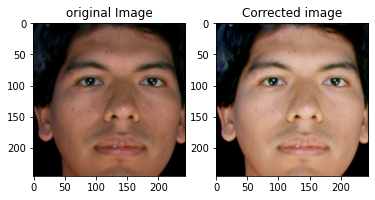

In [ ]:
path = "/content/s038-00_img.tif"
main(path)

In [ ]:
path = "/content/index.jpeg"
image = cv2.imread(path)
image_out = auto_gama_correction(image)

Mean :  0.9975077027354151
Stdev :  0.008920176830168257
Low contrast Image
Bright
gamma value :  4.7194395085768175
heaviside :  0


Text(0.5, 1.0, 'Corrected image')

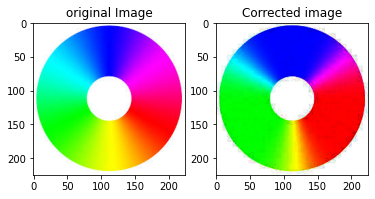

In [ ]:
plt.subplot(121)
plt.imshow(image)
plt.title("original Image")
plt.subplot(122)
plt.imshow(image_out)
plt.title("Corrected image")

In [ ]:
print_report(image/255, image_out/255)

Mean of the Original Image :  0.6768414943919954
Mean of the Corrected Image :  0.00236883614986998

Deviation of the Original Image :  0.42776541214183
Deviation of the Corrected Image :  0.0018147320436653193
